In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('NewerGRTests.pickle', 'rb')
data = pickle.load(f)
f.close()

In [2]:
print(data['var'])
print()
print(data['order'])
print()
for key in data['data'][list(data['data'].keys())[0]].keys():
    print(key)

{'smallImprovement': [0.1, 0.2, 0.3], 'clusteringOn': ['false', 'true'], 'reclusterThreshold': [0.025, 0.05, 0.1], 'localRecluster': [0, 1, 2], 'disableCSThresh': [0, 0.25], 'largeImprovement': [0.5, 0.6, 0.7], 'globalRecluster': [0, 1], 'disableGRThresh': [0, 0.5, 0.7, 0.85], 'GRIncrement': [1.3, 1.5, 1.75, 2]}

['largeImprovement', 'smallImprovement', 'disableGRThresh', 'globalRecluster', 'disableCSThresh', 'GRIncrement', 'localRecluster', 'reclusterThreshold', 'clusteringOn']

Recluster threshold
# False Positive = Confirmations
Avg cluster size
Number of clusters
Percent Alive
Detection Time
Global reclusters
Alive valid nodes
Clusters above thresh
Clusters below thresh
True Positive Readings
# True Positive = Rejections
Cluster searches
# False Negatives Drift
Local Reclusters
Samples
Waits
BTLocalRecluster
BTReadings
# False Negatives
Max Battery
# False Positive Drift
CS Joins
Bluetooth
Min Battery
# False Positive Confirmations
BTClusterSearch
# False Positive Rejections
# Fals

In [4]:
i = 0
print(len(data['data'].keys()))

579


In [18]:
def compareOverTime(compare, keyInds, ignoreDict={}):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for ind in ignoreDict:
            if key[ind] == ignoreDict[ind]:
                ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = run[compare]
            minArrLen = min(minArrLen, len(arr))
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['compare'] = compare
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDict
    return stats

In [19]:
def generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr, titleArr, topY):
    legendTitle = ''
    if currentLevel < len(keyInds):
        currentKey = data['order'][keyInds[currentLevel]]
        for var in data['var'][currentKey]:
            if not (currentKey in stats['ignore'] and stats['ignore'][currentKey] == var):
                legendTitle = generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)], titleArr + [str(currentKey)], topY)
    else:
        key = '-'.join(strArr)
        if key in stats.keys():
            y = stats[key]
            label = '-'.join(strArr[separationLevel:])
            plt.plot(x, y, label=label)
            legendTitle = '-'.join(titleArr[separationLevel:])
    if currentLevel == separationLevel:
        title = '-'.join(titleArr) + ': '
        title += '-'.join(strArr)
        plt.xlabel('Time')
        plt.ylabel(stats['compare'])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legendTitle)
        #plt.legend(title=legendTitle)
        bottom, top = plt.ylim()
        if topY != 0:
            plt.ylim(bottom, topY)
        plt.title(title)
        plt.show()
    return legendTitle

def generateOverTimeGraphs(stats, separationLevel=0, topY=0):
    generateOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [], [], topY)

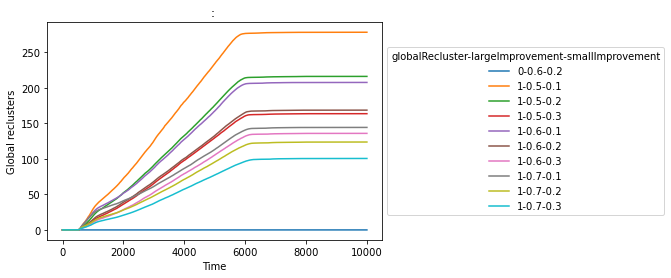

In [238]:
NumGlobalReclusters = compareOverTime('Global reclusters', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(NumGlobalReclusters, 0)

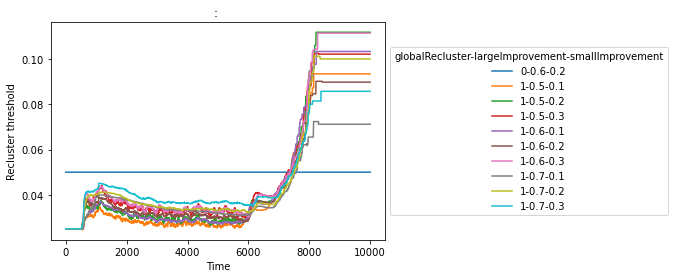

In [239]:
ReclusterThresh = compareOverTime('Recluster threshold', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(ReclusterThresh, separationLevel=0)

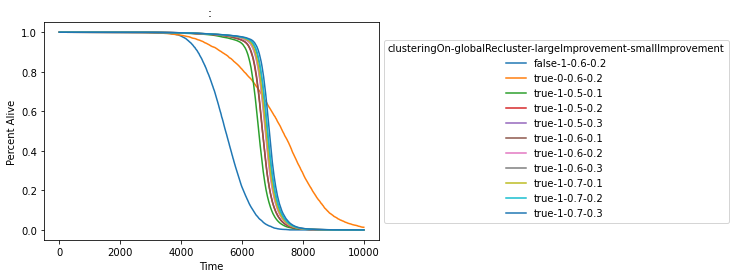

In [262]:
Alive = compareOverTime('Percent Alive', [8,3,0,1], {6:2})
generateOverTimeGraphs(Alive, 0)

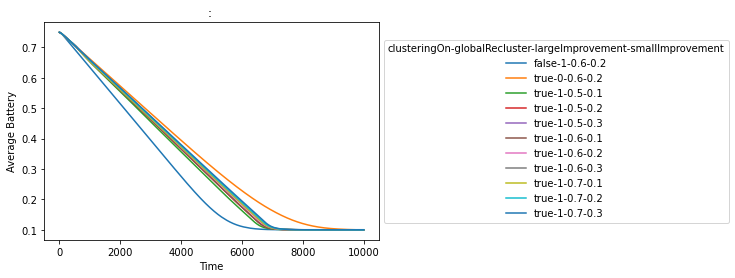

In [243]:
AvgBattery = compareOverTime('Average Battery', [8,3,0,1], {6:2})
generateOverTimeGraphs(AvgBattery, 0)

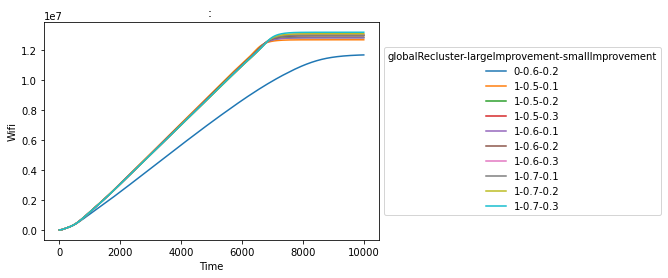

In [244]:
Wifi = compareOverTime('Wifi', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(Wifi, 0)

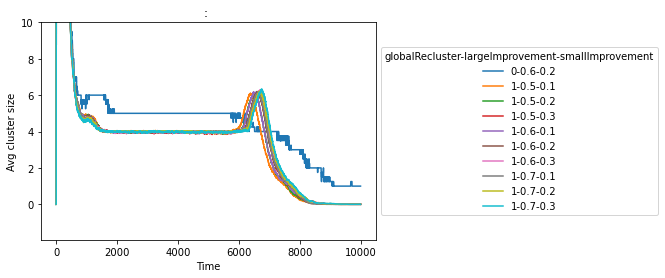

In [245]:
clusterSize = compareOverTime('Avg cluster size', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(clusterSize, topY=10)

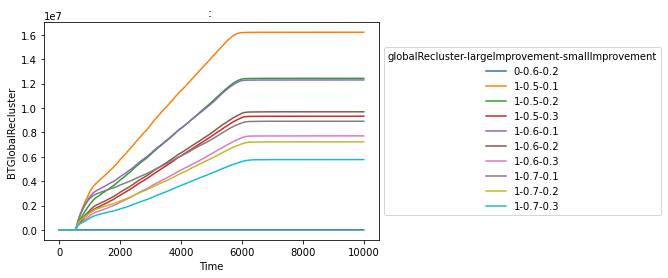

In [246]:
BTGlobalRecluster = compareOverTime('BTGlobalRecluster', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(BTGlobalRecluster, separationLevel=0)

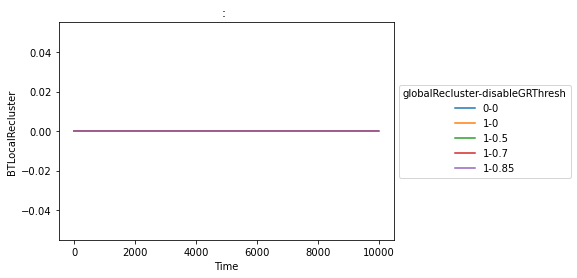

In [247]:
BTLocalRecluster = compareOverTime('BTLocalRecluster', [3,2], {8:'false', 6:0})
generateOverTimeGraphs(BTLocalRecluster, separationLevel=0)

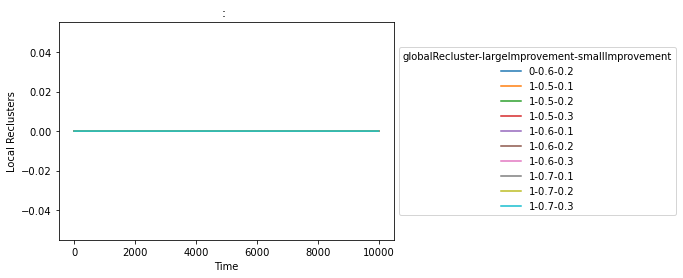

In [248]:
LRs = compareOverTime('Local Reclusters', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(LRs, separationLevel=0)

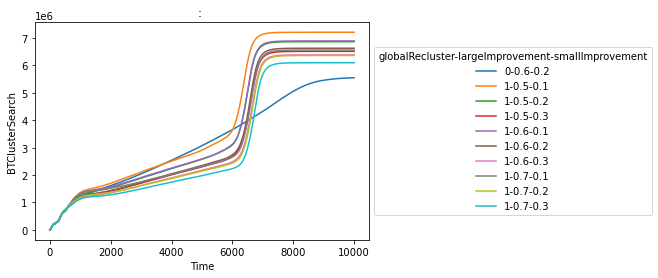

In [249]:
BTClusterSearch = compareOverTime('BTClusterSearch', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(BTClusterSearch, separationLevel=0)

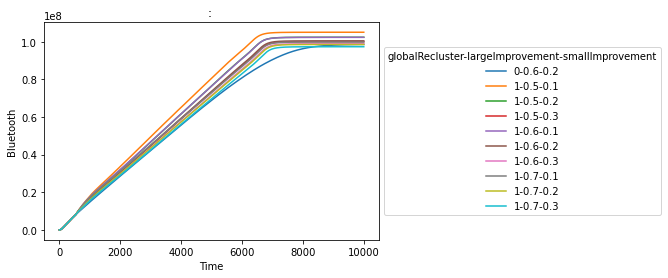

In [250]:
BT = compareOverTime('Bluetooth', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(BT, separationLevel=0)

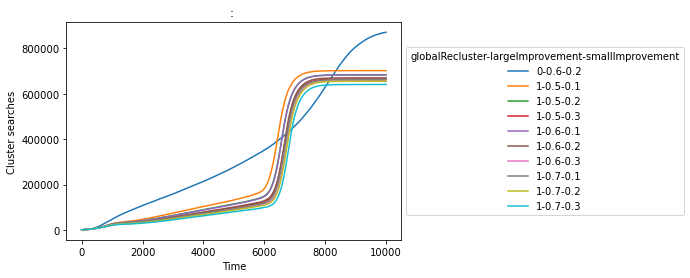

In [251]:
CS = compareOverTime('Cluster searches', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(CS, separationLevel=0)

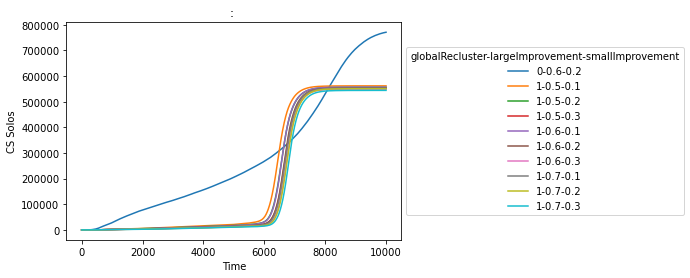

In [252]:
CSSolos = compareOverTime('CS Solos', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(CSSolos, separationLevel=0)

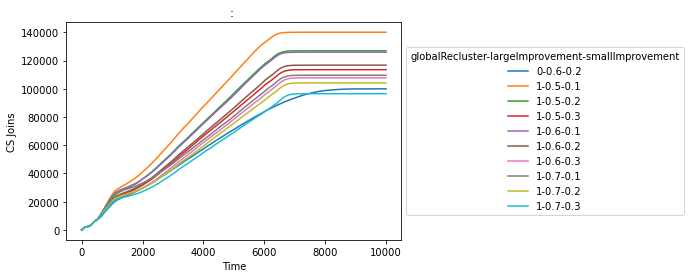

In [253]:
CSJoins = compareOverTime('CS Joins', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(CSJoins, separationLevel=0)

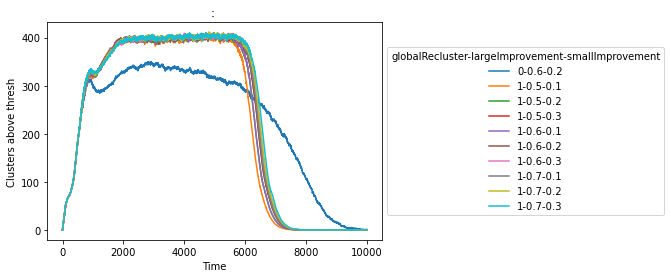

In [254]:
above = compareOverTime('Clusters above thresh', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(above, separationLevel=0)

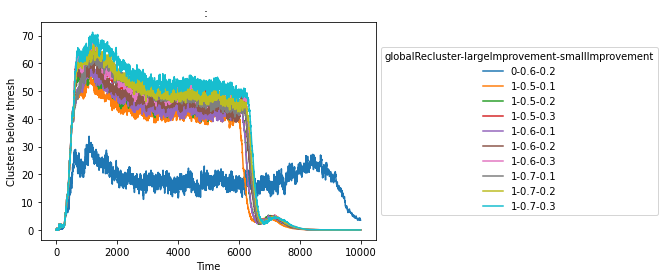

In [255]:
below = compareOverTime('Clusters below thresh', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(below, separationLevel=0)

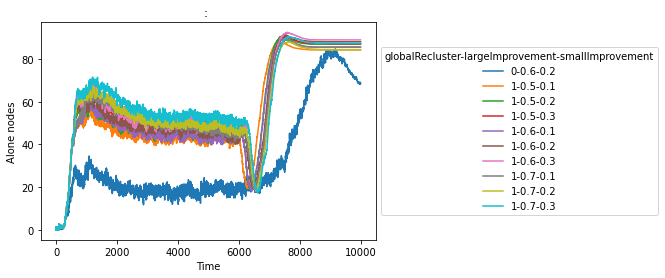

In [256]:
alone = compareOverTime('Alone nodes', [3,0,1], {8:'false', 6:2})
generateOverTimeGraphs(alone, separationLevel=0)

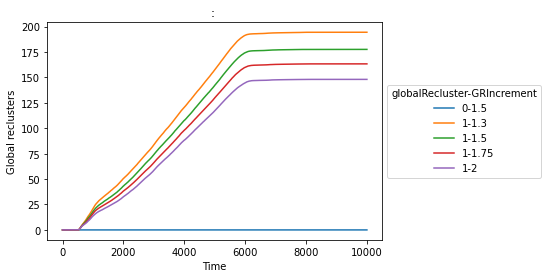

In [257]:
NumGlobalReclusters = compareOverTime('Global reclusters', [3,5], {8:'false', 6:2})
generateOverTimeGraphs(NumGlobalReclusters, 0)

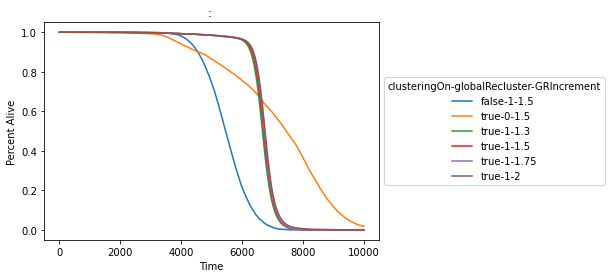

In [259]:
Alive = compareOverTime('Percent Alive', [8,3,5], {6:0})
generateOverTimeGraphs(Alive, 0)

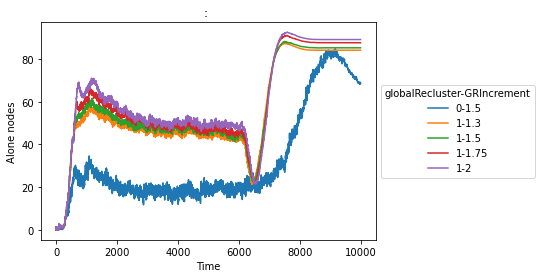

In [260]:
alone = compareOverTime('Alone nodes', [3,5], {8:'false', 6:2})
generateOverTimeGraphs(alone, separationLevel=0)

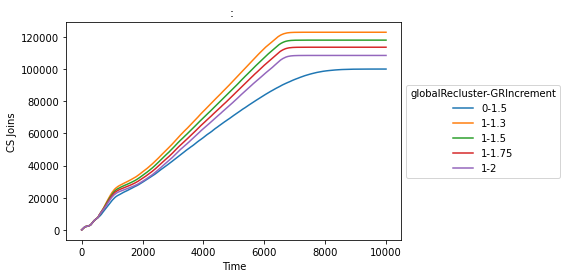

In [261]:
CSJoins = compareOverTime('CS Joins', [3,5], {8:'false', 6:2})
generateOverTimeGraphs(CSJoins, separationLevel=0)